# Load the required packages

In [23]:
import numpy as np
np.random.seed(123)

%matplotlib inline
import matplotlib.pyplot as plt
plt.set_cmap("viridis")

from skopt.benchmarks import branin
from skopt import Optimizer
from pyDOE import *

<Figure size 432x288 with 0 Axes>

## Plot Branin function with all global minimas

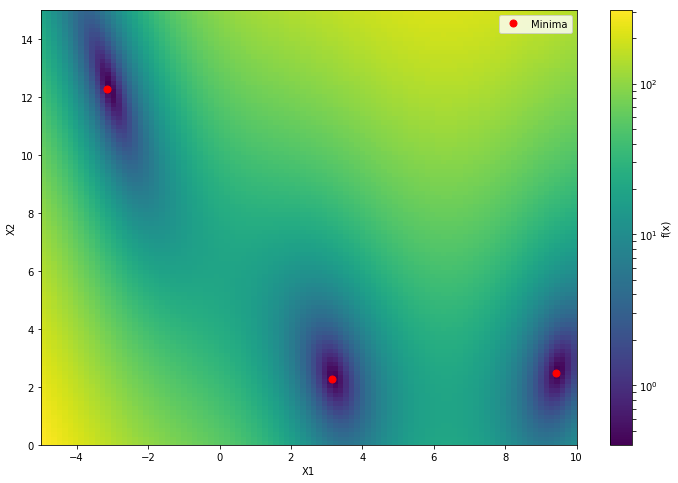

In [59]:
from matplotlib.colors import LogNorm

def plot_branin_with_minima():
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

plot_branin_with_minima()

## Branin function Plot with Training Points

In [60]:
def plot_branin_with_points(X):
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))
    ax.plot(X[:,0], X[:, 1], "k.", markersize=14, lw=0, label="points")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

## Focusing on Negative Branin 

In [62]:
ntrain = 50 # number of initial training points
d = 2 # number of dimensions of the input features

X_train_norm = lhs(2, samples= ntrain, criterion='maximin') # Initial training points
X_train = np.zeros(X_train_norm.shape)
X_train[:,0] = X_train_norm[:,0]*15 - 5.
X_train[:,1] = X_train_norm[:,1]*15
Y_train = -1*branin(X_train.T)
bounds = [(-5.0, 10.0), (0.0, 15.0)]

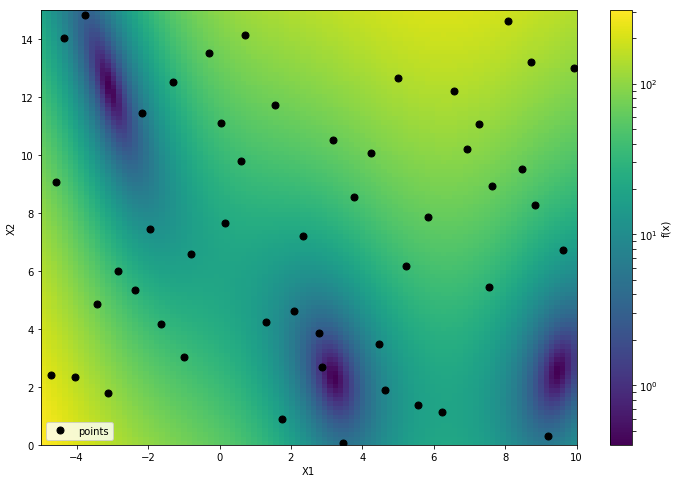

In [63]:
plot_branin_with_points(X_train)

# Train GP conditioned on Training Set

In [64]:
opt = Optimizer(bounds)

In [65]:
opt.tell(X_train.tolist(), Y_train.tolist())

          fun: -205.75385755988088
    func_vals: array([ -17.3425468 ,   -7.07760206,   -4.72526953,  -47.21914873,
        -32.40081493, -205.75385756,  -57.09975663, -177.93109975,
       -111.11016386,  -11.71947975,  -78.01609805,  -12.62372334,
        -40.90626989,  -15.53441072,  -32.15684314,  -11.01476747,
        -19.58891018,  -29.72843644,   -2.66548986,  -37.07288491,
        -40.18128465,  -17.14683526, -129.70249032,  -99.27108   ,
        -64.23415411, -102.76751229,  -21.01233415,  -66.218166  ,
        -39.23965249,  -23.00200878,  -46.5334287 , -108.67942655,
        -63.86459628,  -69.2511715 ,  -72.47413062, -141.8973923 ,
         -3.20097379,  -69.03154935,  -29.82763921,  -68.3597457 ,
         -9.59787017, -101.75359934,   -6.49178078,  -30.33050811,
         -4.55279702, -142.32074902, -154.01085358,   -0.796914  ,
        -17.1914054 ,   -8.43636491])
       models: [GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * Matern(l

In [134]:
opt.ask(n_points= 3)

[[-4.867795965097152, 2.142689869965138],
 [-5.0, 1.2822802020213682],
 [-5.0, 2.0625373428944718]]

In [66]:
model = opt.models[-1]

In [67]:
x1_values = np.linspace(-5, 10, 100)
x2_values = np.linspace(0, 15, 100)
x_ax, y_ax = np.meshgrid(x1_values, x2_values)
X_grid = np.zeros(shape = (x_ax.ravel().shape[0], 2))
X_grid[:,0] = x_ax.ravel()
X_grid[:,1] = y_ax.ravel()

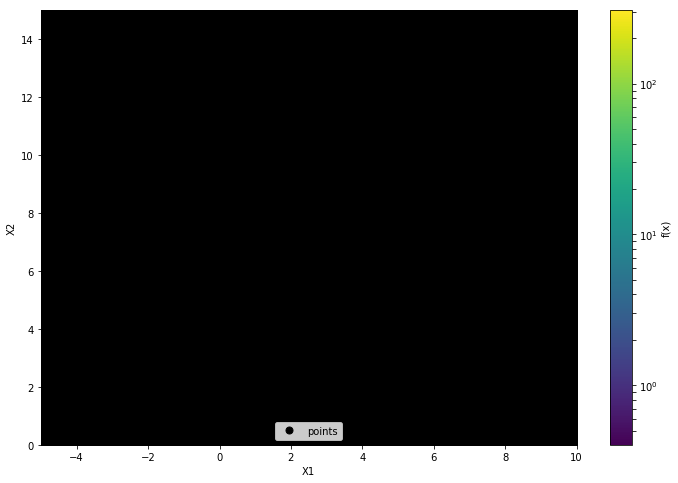

In [68]:
plot_branin_with_points(X_grid)

In [69]:
x_model = opt.space.transform(X_grid.tolist())

# GP Posterior Predictive Distribution

In [70]:
y_pred, sigma = model.predict(x_model, return_std=True)

In [74]:
def plot_branin_pred(y_pred, x1_values, x2_values):
    fig, ax = plt.subplots(figsize = (12,8))
    fx = np.reshape(-1*y_pred, (100, 100))
    cm = ax.pcolormesh(x1_values, x2_values, fx,
                       norm=LogNorm(vmin=2, 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("m(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])
    
    
def plot_branin_var(sigma, x1_values, x2_values):
    fig, ax = plt.subplots(figsize = (12,8))
    fx = np.reshape(sigma, (100, 100))
    cm = ax.pcolormesh(x1_values, x2_values, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("sigma(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

# Posterior Predictive Mean

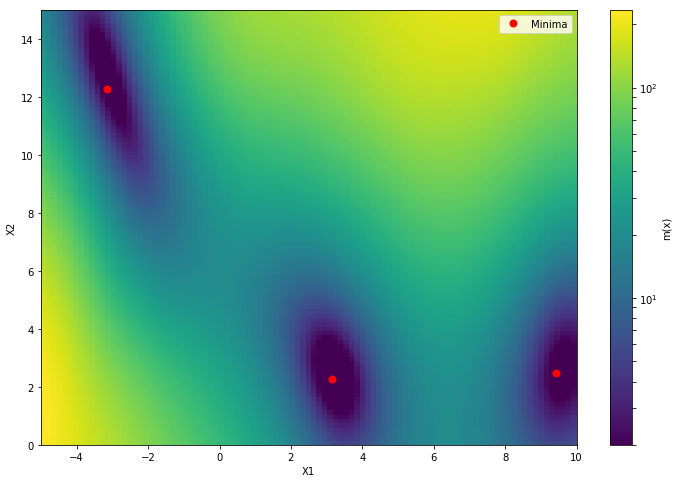

In [75]:
plot_branin_pred(y_pred, x1_values, x2_values)

# Posterior Predictive SD

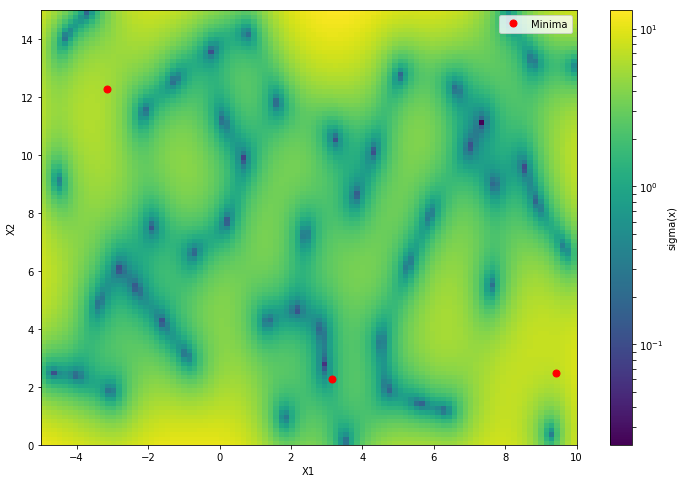

In [73]:
plot_branin_var(sigma, x1_values, x2_values)

# qEI Approximation (Micheal Binois Thesis work)

## Call r functions

## Call to qEI approx R function

In [76]:
with open('qEI_call.r', 'r') as f:
    string = f.read()
qEI = STAP(string, "qEI_call")

# Diferrent Test Batches

In [121]:
num_dim = 2
num_test_batches = 10000
num_sampled_points = 2
sampling_strategy = 'LHS'
norm = True # we need to do unnormalization of LHS sampled points

In [122]:
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

In [123]:
from rpy2.robjects.packages import importr
import rpy2.robjects.numpy2ri as rpyn
rcpp = importr("Rcpp")
rcpp.sourceCpp('qEI.cpp')
batches = []
max_obj = np.max(Y_train)
cc_vec = np.zeros(num_test_batches)
for i in range(num_test_batches):
    if sampling_strategy == 'LHS': 
        b = lhs(num_dim, num_sampled_points)
    else:
        print ("No such sampling strategy exists ..")
    
    if norm == True:
        #print ('Unnormalizing the LHS sampling based points')
        b[:,0] = b[:,0]*15 - 5.
        b[:,1] = b[:,1]*15
    else:
        b = b
        
    batches.append(b)
    mean, covar = model.predict(b, return_cov=True)
    cc = qEI.qEI_approx(mean, covar, max_obj)
    cc_num = rpyn.ri2py(cc)
    cc_vec[i] = cc_num

max_qEI_val = np.max(cc_vec)
max_qEI_val_ind = np.argmax(cc_vec)
best_batch = batches[max_qEI_val_ind]

In [ ]:
def multipoint_qEI(model, Y_train,  num_dim, num_test_batches,
                   num_sampled_points, sampling_strategy, norm):
    """
    Ask for new batch of elicitation points (Micheal Binois PhD thesis approximation to qEI)
    """
    rcpp.sourceCpp('qEI.cpp')
    batches = []
    max_obj = np.max(Y_train)
    cc_vec = np.zeros(num_test_batches)
    for i in range(num_test_batches):
        
        if sampling_strategy == 'LHS': 
            b = lhs(num_dim, num_sampled_points)
        else:
            print ("No such sampling strategy exists ..")
    
        if norm == True:
            #print ('Unnormalizing the LHS sampling based points')
            b[:,0] = b[:,0]*15 - 5.
            b[:,1] = b[:,1]*15
        else:
            b = b
        batches.append(b)
        mean, covar = model.predict(b, return_cov=True)
        cc = qEI.qEI_approx(mean, covar, max_obj)
        cc_num = rpyn.ri2py(cc)
        cc_vec[i] = cc_num
    max_qEI_val = np.max(cc_vec)
    max_qEI_val_ind = np.argmax(cc_vec)
    best_batch = batches[max_qEI_val_ind]
    
    return best_batch

In [133]:
model

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * Matern(length_scale=[1, 1], nu=2.5) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=2, noise='gaussian', normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=1457460445)

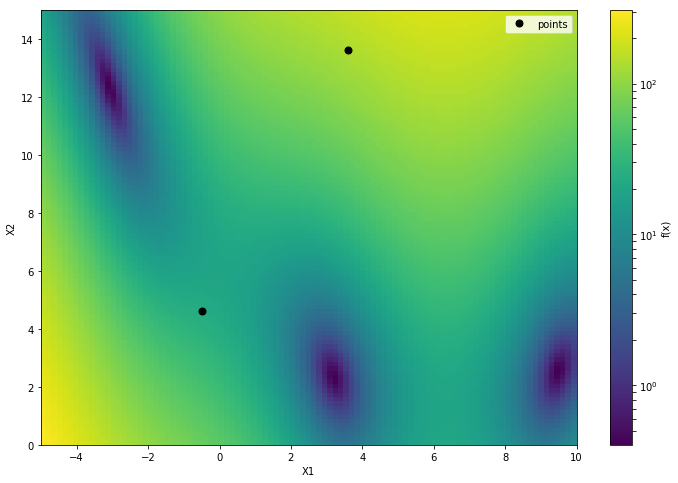

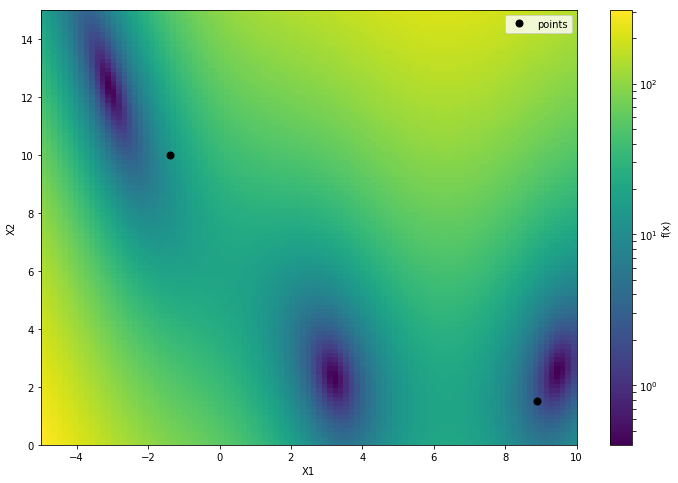

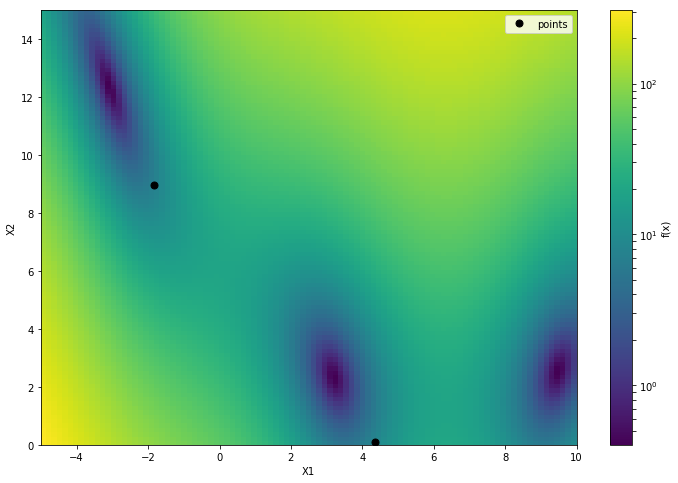

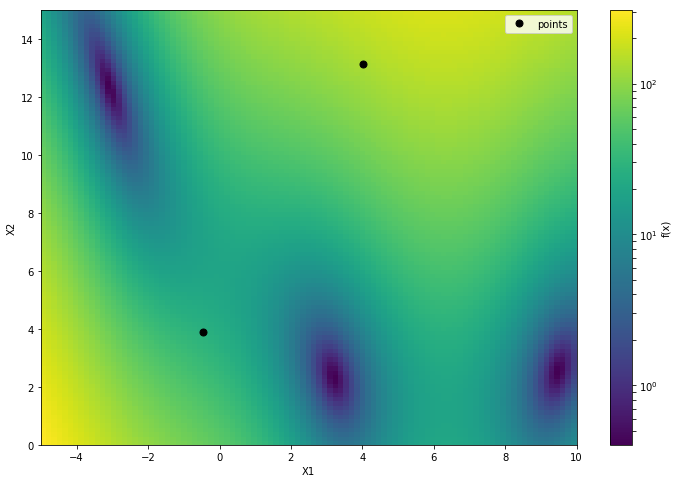

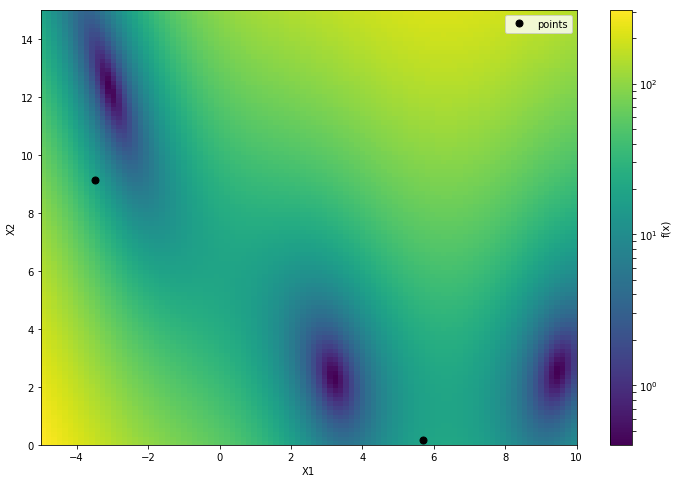

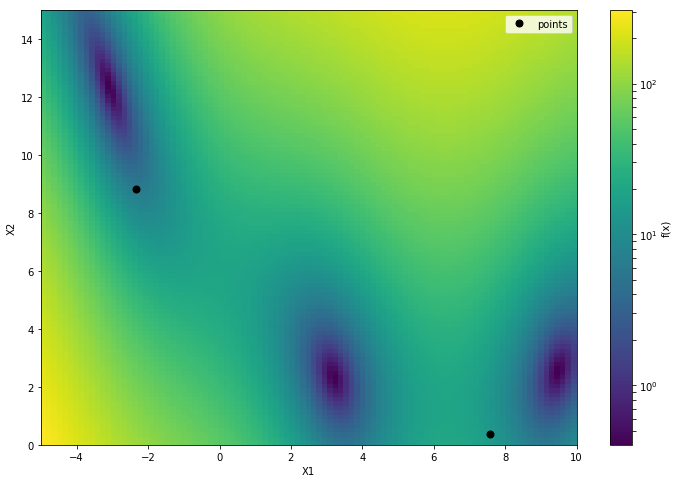

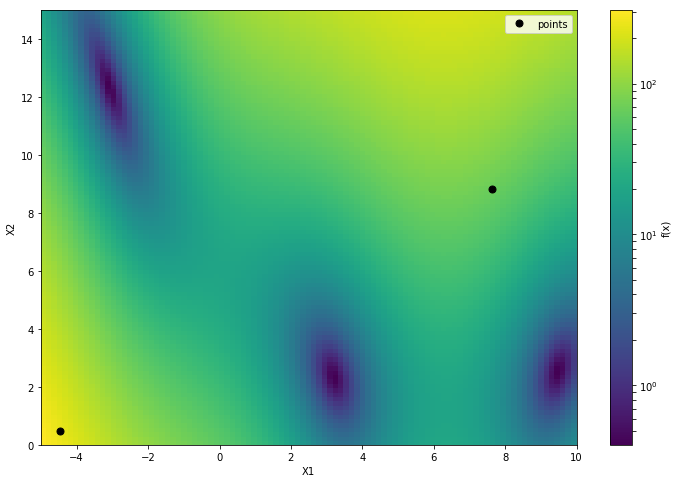

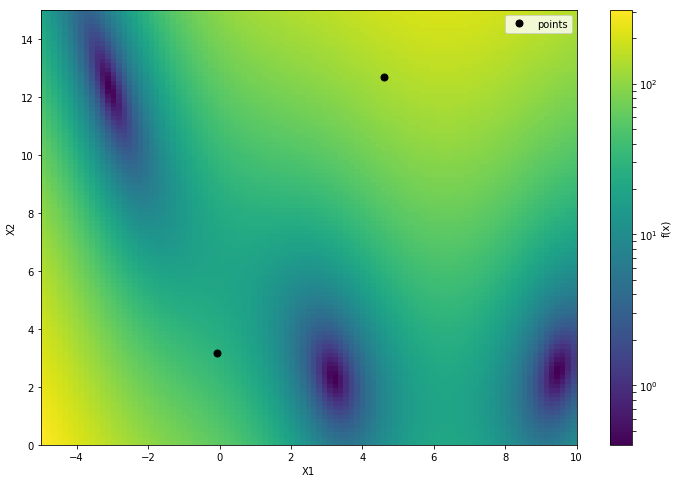

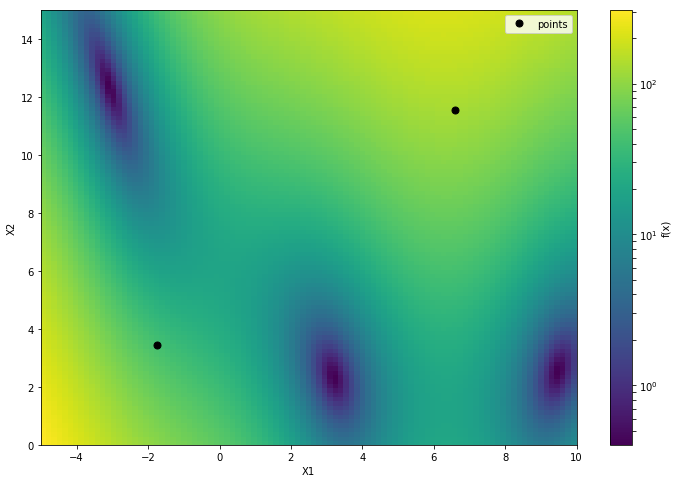

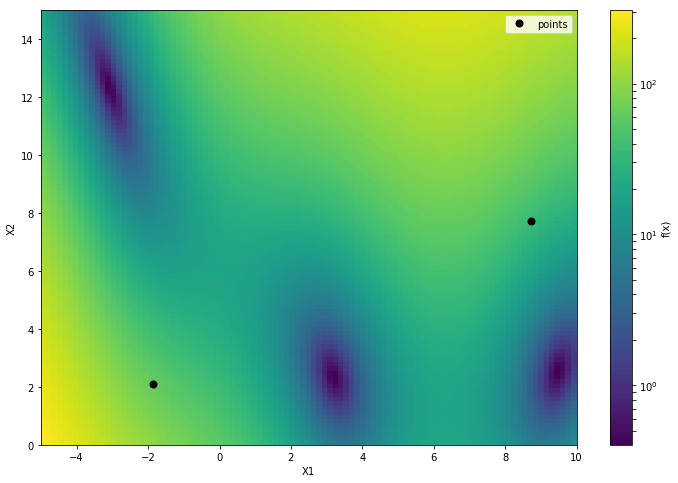

In [129]:
for a in batches[:10]:
    plot_branin_with_points(np.array(a))

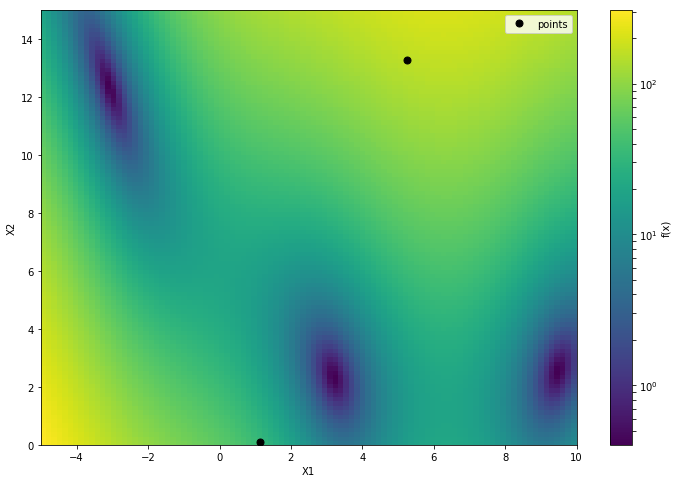

In [125]:
plot_branin_with_points(np.array(best_batch))

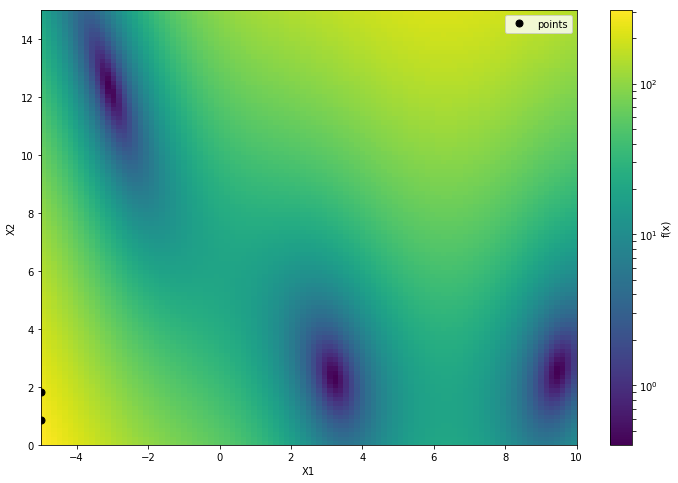

In [136]:
plot_branin_with_points(np.array(opt.ask(2)))

In [139]:
opt.ask(10)

[[-5.0, 0.0],
 [-4.903441690108498, 1.9299571819936772],
 [-5.0, 1.4386247203906024],
 [-5.0, 1.3854271352859775],
 [-5.0, 1.3995773064439883],
 [-5.0, 1.400084686596885],
 [-5.0, 1.4229302614356032],
 [-5.0, 1.4502627402448645],
 [-5.0, 1.4820244860486635],
 [-5.0, 1.464864864335322]]